In [1]:
import scanpy as sc

In [2]:
import decoupler as dc

In [3]:
import pandas as pd

In [4]:
adata = sc.read_h5ad("adata_solo_annotated.h5ad")

In [5]:
adata

AnnData object with n_obs × n_vars = 60459 × 11945
    obs: '_scvi_batch', '_scvi_labels', 'batch', 'batch_id', 'cell_type', 'condition', 'is_doublet', 'is_outlier', 'is_outlier_counts', 'is_outlier_genes', 'is_outlier_mito', 'is_outlier_top_20', 'leiden', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'log1p_total_counts_ribo', 'n_counts', 'n_genes', 'n_genes_by_counts', 'origin', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'sample_id', 'total_counts', 'total_counts_mt', 'total_counts_ribo', 'value', 'outlier', 'mt_outlier', 'ribo_outlier'
    var: 'ensembl_id', 'feature_types', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'cell_type_colors', 'hvg', 'is_doublet_colors', 'leiden', 'log1p', 'neighbo

In [6]:
def update_columns_condition(row):

    if row["sample_id"] == "10mix1":
        row["condition"] = "10mix"
    elif row["sample_id"] == "10mix2":
        row["condition"] = "10mix"
    elif row["sample_id"] == "11mix1":
        row["condition"] = "11mix"
    elif row["sample_id"] == "11mix2":
        row["condition"] = "11mix"
    elif row["sample_id"] == "GF1":
        row["condition"] = "GF"
    elif row["sample_id"] == "GF2":
        row["condition"] = "GF"
    elif row["sample_id"] == "GF_ICI2_plus":
        row["condition"] = "GF"
    elif row["sample_id"] == "GF_ICI1_plus":
        row["condition"] = "GF"
    elif row["sample_id"] == "GF_ICI2":
        row["condition"] = "GF"
    elif row["sample_id"] == "GF_ICI1":
        row["condition"] = "GF"
    elif row["sample_id"] == "10mix_ICI1":
        row["condition"] = "10mix"
    elif row["sample_id"] == "10mix_ICI2":
        row["condition"] = "10mix"
    elif row["sample_id"] == "11mix_ICI1":
        row["condition"] = "11mix"
    elif row["sample_id"] == "11mix_ICI2":
        row["condition"] = "11mix"

    return row

In [7]:
# Apply the function to each row in the DataFrame
adata.obs = adata.obs.apply(update_columns_condition, axis=1)

In [8]:
adata.obs.condition

AAACCTGAGTTAAGTG-1_10mix1          10mix
AAACCTGCAGGATCGA-1_10mix1          10mix
AAACCTGCATAACCTG-1_10mix1          10mix
AAACCTGCATACCATG-1_10mix1          10mix
AAACCTGGTGTGCCTG-1_10mix1          10mix
                                   ...  
TTTGTCATCCCTTGCA-1_GF_ICI2_plus       GF
TTTGTCATCGTTGCCT-1_GF_ICI2_plus       GF
TTTGTCATCTAACTGG-1_GF_ICI2_plus       GF
TTTGTCATCTCTGTCG-1_GF_ICI2_plus       GF
TTTGTCATCTGTTGAG-1_GF_ICI2_plus       GF
Name: condition, Length: 60459, dtype: object

In [9]:
adata = adata[adata.obs["cell_type"]!="nan"]

In [10]:
set(adata.obs.cell_type)

{'COLON_Exhausted',
 'COLON_Infg',
 'COLON_Intermediate',
 'COLON_Naive',
 'MPEC_Effector',
 'MPEC_Intermediate',
 'MPEC_Progenitor',
 'SLEC_Effector',
 'SLEC_Inf',
 'SLEC_Intermediate',
 'SLEC_Plastic',
 'SLEC_Progenitor',
 'SLEC_Terminal'}

In [11]:
pdata = dc.get_pseudobulk(
    adata,
    sample_col='sample_id',
    groups_col='cell_type',
    layer='counts',
    min_cells=0,
    min_counts=0
)

In [12]:
pdata

AnnData object with n_obs × n_vars = 95 × 11943
    obs: '_scvi_batch', '_scvi_labels', 'batch', 'batch_id', 'cell_type', 'condition', 'is_doublet', 'is_outlier', 'is_outlier_genes', 'origin', 'sample_id', 'value', 'outlier', 'mt_outlier', 'ribo_outlier', 'psbulk_n_cells', 'psbulk_counts'
    var: 'ensembl_id', 'feature_types', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    layers: 'psbulk_props'

In [13]:
path = "/data/scratch/kvalem/projects/2021/honda_microbial_metabolites_2021/40_tables/40_single-cell-sorted-cd8/40_gex_surface_prot"#

In [14]:
### Samplesheet
samplesheet = pdata.obs.copy()
samplesheet["sample_id"]=samplesheet.index
samplesheet.reset_index(inplace=True)

In [15]:
samplesheet.to_csv(f"{path}/samplesheet_ps.csv", index=False)
samplesheet.to_csv(f"{path}/samplesheet_ps.tsv", index=False, sep = "\t")

In [16]:
samplesheet

,index,_scvi_batch,_scvi_labels,batch,batch_id,cell_type,condition,is_doublet,is_outlier,is_outlier_genes,origin,sample_id,value,outlier,mt_outlier,ribo_outlier,psbulk_n_cells,psbulk_counts
0,10mix1_COLON_Exhausted,0,0,0,1,COLON_Exhausted,10mix,singlet,False,False,colon,10mix1_COLON_Exhausted,0,False,False,False,686.0,3093022.0
1,10mix2_COLON_Exhausted,0,0,1,2,COLON_Exhausted,10mix,singlet,False,False,colon,10mix2_COLON_Exhausted,0,False,False,False,504.0,2233817.0
2,11mix1_COLON_Exhausted,0,0,2,NaN,COLON_Exhausted,11mix,singlet,False,False,colon,11mix1_COLON_Exhausted,0,False,False,False,1184.0,4930903.0
3,11mix2_COLON_Exhausted,0,0,3,NaN,COLON_Exhausted,11mix,singlet,False,False,colon,11mix2_COLON_Exhausted,0,False,False,False,1612.0,6762942.0
4,GF1_COLON_Exhausted,0,0,4,NaN,COLON_Exhausted,GF,singlet,False,False,colon,GF1_COLON_Exhausted,0,False,False,False,61.0,210281.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,11mix_ICI2_SLEC_Terminal,0,0,3,ICI2,SLEC_Terminal,11mix,singlet,False,False,til,11mix_ICI2_SLEC_Terminal,0,False,False,False,732.0,3629119.0
91,GF_ICI1_SLEC_Terminal,0,0,4,ICI1,SLEC_Terminal,GF,singlet,False,False,til,GF_ICI1_SLEC_Terminal,0,False,False,False,888.0,4575330.0
92,GF_ICI1_plus_SLEC_Terminal,0,0,6,ICI1,SLEC_Terminal,GF,singlet,False,False,til,GF_ICI1_plus_SLEC_Terminal,0,False,False,False,748.0,4269383.0
93,GF_ICI2_SLEC_Terminal,0,0,5,ICI2,SLEC_Terminal,GF,singlet,False,False,til,GF_ICI2_SLEC_Terminal,0,False,False,False,514.0,2773511.0


In [17]:
bulk_df = pdata.to_df().T

In [18]:
### Raw counts
bulk_df = pdata.to_df().T
bulk_df["gene_id"]=bulk_df.index
bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")

/tmp/ipykernel_1910337/2556203671.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")


In [19]:
bulk_df.to_csv(f"{path}/counts_ps.csv")

In [20]:
scales_counts = sc.pp.normalize_total(pdata, target_sum=None, inplace=False)
# log1p transform
pdata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

In [21]:
### log1p_norm counts
pdata_log1p_norm = pd.DataFrame(pdata.layers["log1p_norm"], 
    pdata.to_df().index, 
    pdata.to_df().columns)
bulk_df = pdata_log1p_norm.T
bulk_df["gene_id"]=bulk_df.index
bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
bulk_df.to_csv(f"{path}/log1p_norm_counts_ps.csv")   

/tmp/ipykernel_1910337/222706917.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")


In [22]:
adata

View of AnnData object with n_obs × n_vars = 43068 × 11945
    obs: '_scvi_batch', '_scvi_labels', 'batch', 'batch_id', 'cell_type', 'condition', 'is_doublet', 'is_outlier', 'is_outlier_counts', 'is_outlier_genes', 'is_outlier_mito', 'is_outlier_top_20', 'leiden', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'log1p_total_counts_ribo', 'n_counts', 'n_genes', 'n_genes_by_counts', 'origin', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'sample_id', 'total_counts', 'total_counts_mt', 'total_counts_ribo', 'value', 'outlier', 'mt_outlier', 'ribo_outlier'
    var: 'ensembl_id', 'feature_types', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'cell_type_colors', 'hvg', 'is_doublet_colors', 'leiden', 'log1p', 

/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initiali

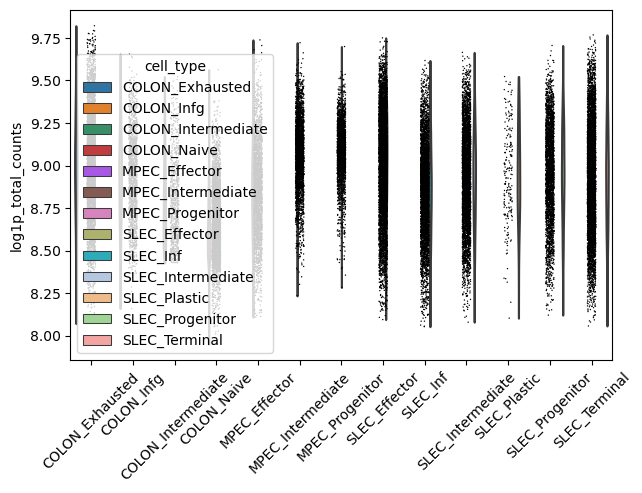

In [23]:
sc.pl.violin(adata, keys='log1p_total_counts', groupby='cell_type', rotation=45, show_legend=False)

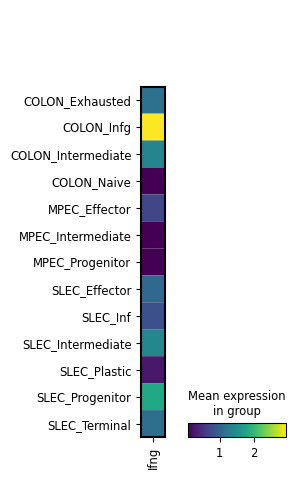

In [24]:
sc.pl.matrixplot(adata, "Ifng", groupby='cell_type', dendrogram=False, gene_symbols="gene_name")

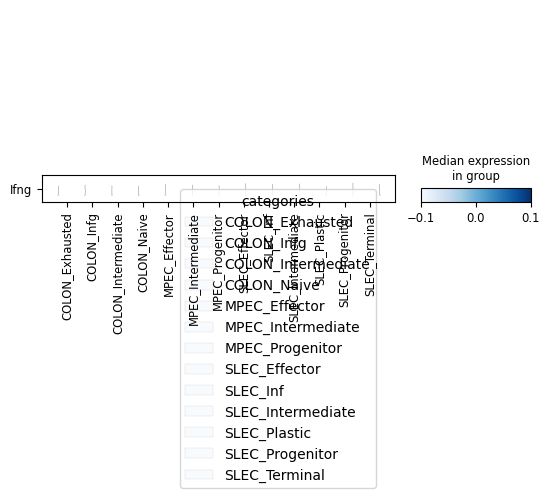

In [25]:
markers = ['Ifng']
sc.pl.stacked_violin(adata, markers, groupby='cell_type', dendrogram=False, gene_symbols="gene_name", swap_axes=True, show_legend=False)